# Decision Tree (ต้นไม้ตัดสินใจ) 

เป็นอัลกอริทึมพื้นฐานที่สำคัญตัวหนึ่งของ ML อยู่ในกลุ่ม Supervised Learning\
เป็นการเรียนรู้จากคุณลักษณะ(Attributes) ของข้อมูล แล้วสร้างผังตัดสินใจคล้ายกับต้นไม้\
เอาไว้ใช้สำหรับการจำแนกหรือแยกแยะ(Classification) ว่าข้อมูลอยู่ในกลุ่มใด\
โดยผลลัพธ์จะมีเพียงสองกลุ่ม หรือมากกว่า 2 กลุ่มก็ได้ โดยกลุ่มดังกล่าวเรียกว่า Class

In [1]:
#เตรียมข้อมูลที่จะนำไป Train (สอน) ให้คอมพิวเตอร์เรียนรู้
#[size] ไม่ต้องเรียงขนาด

X = [[27],
    [35],
    [39],
    [21],
    [22],
    [45]]

y_names = ['lemon','orange','orange','lemon','lemon','orange']
y = [0,1,1,0,0,1]    #Output/Class/Target/Label

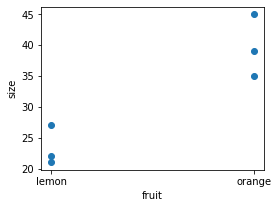

In [2]:
#พล็อตกราฟ  ดูค่าขนาด

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(4,3))

plt.xlabel('fruit')
plt.ylabel('size')

plt.scatter(y_names, X)
plt.show()

In [3]:
#สร้าง Model

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X, y)     #คอมพิวเตอร์จะเรียนรู้โดยอ้างอิงจากค่า X, y ทีละรายการ

DecisionTreeClassifier()

In [6]:
#ทำนาย
#หลังจากได้ Model ปกติจะต้องประเมิน Model ก่อน แต่ตอนนี้จะข้ามไป
#ขั้นตอนการทำงาน คือใส่ input แล้วระบบจะจำแนกแยกแยะว่าเป็นผลไม้อะไร 
#ตอน train ใช้ตัวแปรใดสอน ตอนทำนายก็ต้องใช้ตัวแปรนั้นเป็น input

#กำหนดค่าภายใน [[]] เพื่อทำให้ปเ็นเมทริกซ์ รูปแบบเหมือนกับค่า X ในการ train
data = [[25]]                    #ขนาดผลไม้ผลหนึ่ง (New input = 25)
y_predict = model.predict(data)  #ทำนาย
print('Result =', y_predict[0])  #แสดงผลลัพธ์

Result = 0


In [7]:
#ค่า Output บอกว่า ผลไม้ = 0 คือ lemon นั่นเอง

In [9]:
#ให้การแสดงผลกลับมาเป็นชื่อผลไม้ แทนที่ตัวเลข จะได้ดูง่าย ๆ 
class_names = ['lemon','orange']

In [10]:
#ลองทำนายใหม่
data = [[25]]
y_predict = model.predict(data)

prd = class_names[y_predict[0]]
print('Result = {}'.format(prd))

Result = lemon


In [11]:
#ทดลองค่าอื่น

data = [[35]]
y_predict = model.predict(data)

prd = class_names[y_predict[0]]
print('Result = {}'.format(prd))

Result = orange


In [14]:
#กรณีอยาก input พร้อมกันหลาย ๆ ค่า

data = [[32], [25], [21], [38]]
y_predict = model.predict(data)

print('Result:')
for i in y_predict:
    print(class_names[i])

Result:
orange
lemon
lemon
orange


In [ ]:
##### การใช้งานในระบบรวม 
#โครงสร้างโปรแกรม จะมีส่วนที่วนรอบรับ Input และส่วนที่นำ Input ส่งไปทำนาย โค้ดย่อ ๆ มีต่อไปนี้

while True:
    size = eval(input("Size : "))
    data = [size]
    y_predict = model.predict([data])
    result = class_names[y_predict[0]]
    print(result)
    if (result == 'lemon'):
        print('<--- Push to Lemon Basket')
    else:
        print('Push to Orange Basket --->')        
    
print('done')

In [2]:
#แสดง Tree model

#สร้าง model จาก Workshop1

X = [[27],
    [35],
    [39],
    [21],
    [22],
    [45]]

y_names = ['lemon','orange','orange','lemon','lemon','orange']
y = [0,1,1,0,0,1] 

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X, y)    

DecisionTreeClassifier()

In [3]:
model

DecisionTreeClassifier()

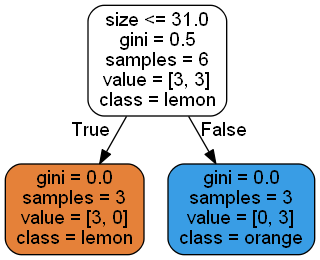

In [5]:
#รันโค้ดสร้างไดอะแกรม Tree จาก Model

import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

data_feature_names = ['size']          #ชื่อ features ที่จะปรากฏในแต่ละช่องของไดอะแกรม
fruit_types = ['lemon', 'orange']      #ชื่อ class ที่จะคัดแยก

#สร้างข้อมูล dot_data จากตัวแปร model (ข้อมูลนี้จะนำไปพล็อตกราฟ)
dot_data = export_graphviz(model, out_file=None, 
                           feature_names=data_feature_names,  
                           class_names=fruit_types, # 
                           filled=True,
                           rounded=True)


graph = pydotplus.graph_from_dot_data(dot_data)     
Image(graph.create_png())                           #แสดงไดอะแกรม
#graph.write_png('tree-fruit.png')                  #save ไฟล์ไดอะแกรม

In [6]:
#ทดลองอัปเดต Model

X = [[65],[78],[90],[61],[84],[62],[69],[82],[89],[63]]
y_names = ['lemon','orange','orange','lemon','orange','lemon','lemon','orange','orange','lemon']
y = [0,1,1,0,1,0,0,1,1,0]

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X, y)    

DecisionTreeClassifier()

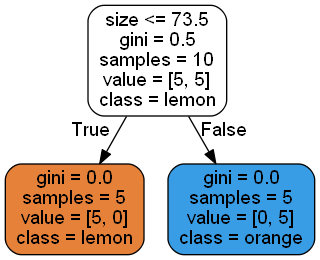

In [7]:
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

data_feature_names = ['size']          #ชื่อ features ที่จะปรากฏในแต่ละช่องของไดอะแกรม
fruit_types = ['lemon', 'orange']      #ชื่อ class ที่จะคัดแยก

#สร้างข้อมูล dot_data จากตัวแปร model (ข้อมูลนี้จะนำไปพล็อตกราฟ)
dot_data = export_graphviz(model, out_file=None, 
                           feature_names=data_feature_names,  
                           class_names=fruit_types, # 
                           filled=True,
                           rounded=True)


graph = pydotplus.graph_from_dot_data(dot_data)     
Image(graph.create_png())                           #แสดงไดอะแกรม

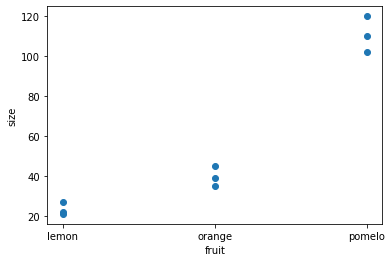

In [8]:
#สร้างข้อมูล

X = [[27],[35],[39],[21],[22],[45],[102],[110],[120]]
y_names = ['lemon','orange','orange','lemon','lemon','orange','pomelo','pomelo','pomelo']
y = [0,1,1,0,0,1,2,2,2]

#พล็อตกราฟดูกลุ่มข้อมูล
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('fruit')
plt.ylabel('size')
plt.scatter(y_names, X)
plt.show()

In [9]:
#จะเห็นว่าข้อมูลแบ่งออกเป็น 3 กลุ่ม ช่วงตัดอยู่ที่ประมาณ 31 และ 80 ฯลฯ (ถ้าเขียน if ก็จะต้องมี 2-3 เงื่อนไข ยิ่ง Classมาก เงื่อนไขก็มาก)

#นำข้อมูลใหม่มา Train สร้าง Model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X, y)    

DecisionTreeClassifier()

In [14]:
class_names = ['lemon','orange', 'pomelo']

data = [[25]]                       #ขนาดที่จะให้ระบบแยกแยะว่าเป็นอะไร
y_predict = model.predict(data)

prd = class_names[y_predict[0]]
print('Result : {}'. format(prd))

Result : lemon


In [11]:
data = [[43]]
y_predict = model.predict(data)

prd = class_names[y_predict[0]]
print('Result : {}'. format(prd))

Result : orange


In [15]:
data = [[104]]
y_predict = model.predict(data)

prd = class_names[y_predict[0]]
print('Result : {}'. format(prd))

Result : pomelo


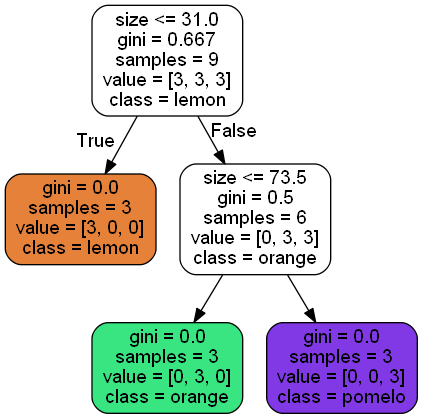

In [16]:
#สร้าง diagram
data_feature_names = ['size']
fruit_types = ['lemon','orange','pomelo'] 

import pydotplus

from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(model, out_file=None, 
                           feature_names=data_feature_names,  
                           class_names=fruit_types, # 
                           filled=True,
                           rounded=True)


graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [17]:
#ใช้ Scikit-learn LabelEncoder

from sklearn.preprocessing import LabelEncoder
y_le = LabelEncoder()
y = y_le.fit_transform(y_names)
y

array([0, 1, 1, 0, 0, 1, 2, 2, 2], dtype=int64)

In [18]:
#กรณีมี Class จำนวนมาก ต้องการดูว่า Class ทั้งหมด มีอะไรบ้าง ใช้โค้ดดังนี้
class_names = list(y_le.classes_)
class_names

['lemon', 'orange', 'pomelo']

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

X = [[27],                                                              
     [35],                                                              
     [39],                                                              
     [21],                                                              
     [22],                                                                   
     [45],
     [102],
     [110],
     [120],
    ]                                                              

y_names = ['lemon', 'orange', 'orange', 'lemon', 'lemon', 'orange', 'pamelo', 'pamelo', 'Pamelo']

# y = [0, 1, 1, 0, 0, 1, 2, 2, 2]   #ไม่ต้องมีแล้ว เนื่องจากใช้ label encoder แทน
y_le = LabelEncoder()

y = y_le.fit_transform(y_names)

class_names = list(y_le.classes_)  # class names หรือชนิดผลไม้
print('all class: {}'. format(class_names))

model = DecisionTreeClassifier()
model.fit(X, y)

data = [[125]] # ทดสอบการทำนาย
y_predict = model.predict(data)

prd = class_names[y_predict[0]]
print('Result: size {} -> {}'. format(data[0],prd))

all class: ['Pamelo', 'lemon', 'orange', 'pamelo']
Result: size [125] -> Pamelo


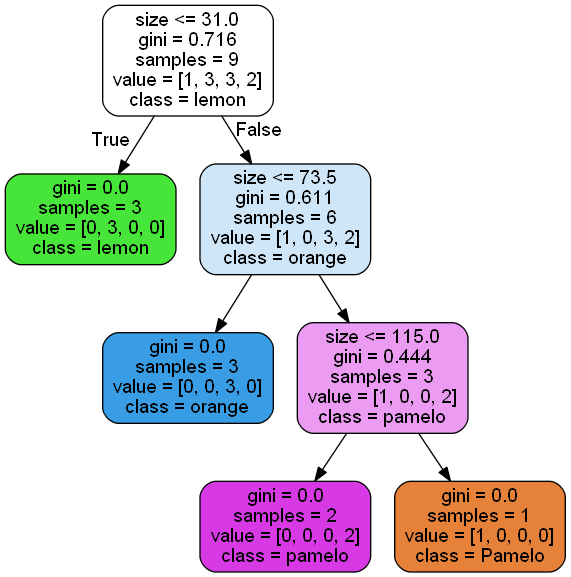

In [20]:
#แสดง Diagram Tree
data_feature_names = ['size']
fruit_types = class_names                                             #ใช้ค่าจากโค้ด (ไม่ต้องกำหนดเองแล้ว)

import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(model, out_file=None, 
                           feature_names=data_feature_names,  
                           class_names=fruit_types, # 
                           filled=True,
                           rounded=True)


graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [22]:
#Workshop ตัดสินใจจะเล่นเทนนิสหรือไม่

#มีหลายปัจจัย ขึ้นอยู่กับสภาอากาศ โดยเก็บข้อมูลสภาพอากาศในแต่ละวันและผลการตัดสินใจว่าจะเล่นหรือไม่เล่นเทนนิส รวม 14 วัน (ใช้สำหรับศึกษา Decision Tree เท่านั้น)

#Features ประกอบการตัดสินใจ
#outlook:สภาพแดด sunny:แดดจ้า overcast:เมฆมากมืดครึ้ม rainy:มีฝน
#temp:สภาพอากาศ hot:ร้อน cool:เย็น mild:กลางๆ
#humidity:ความชื้น high normal
#windy:ลม True:มีลมโกรก False:ลมไม่แรง

#ผลการตัดสินใจ (Class)
#play: เป็น Class ตัดสินใจว่าจะเล่นเทนนิสหรือไม่ มี 2 Class (Yes/No) เช่น ถ้าแดดจ้า อากาศร้อน ความชื้นสูง ลมไม่แรง ผลการตัดสินใจ play=no



#เตรียมข้อมูล
import pandas as pd
df = pd.read_csv('data/playtennis.csv')
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [23]:
df.dtypes

outlook     object
temp        object
humidity    object
windy         bool
play        object
dtype: object

In [24]:
df.play.unique()    #ดูข้อมูลที่ใช้เป็น class ว่ามีกี่ class

array(['no', 'yes'], dtype=object)

In [25]:
df.groupby('play').count()   #นับจำนวนว่าแต่ละ class มีกี่ข้อมูล

,outlook,temp,humidity,windy
play,,,,
no,9,9,9,9
yes,11,11,11,11


In [26]:
df.isnull().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

In [27]:
#(ค่า -1 หมายถึงตัดคอลัมน์ท้าย (play) ทิ้งไป เนื่องจาก play เป็น Class ของ output ผลลัพธ์ ดังนั้นจะแยกเอาไปไว้ใน y ต่างหาก)
X = df.iloc[: , :-1]     #หรือ X = df.drop('play', axis=1) ก็ได้
y = df.play

In [28]:
X

,outlook,temp,humidity,windy
0,sunny,hot,high,False
1,sunny,hot,high,True
2,overcast,hot,high,False
3,rainy,mild,high,False
4,rainy,cool,normal,False
5,rainy,cool,normal,True
6,overcast,cool,normal,True
7,sunny,mild,high,False
8,sunny,cool,normal,False
9,rainy,mild,normal,False


In [29]:
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
14    yes
15    yes
16     no
17     no
18     no
19     no
Name: play, dtype: object

In [30]:
#สร้าง model

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X, y)



ValueError: could not convert string to float: 'sunny'

In [31]:
#Error เพราะประมวลผล string 'sunny' ไม่ได้ ต้องเข้ารหัสแปลง str เป็นตัวเลขก่อน 

In [33]:
#เข้ารหัสด้วย Label Encoding
#เข้ารหัส outlook, temp, humidity, windy แปลง string ข้อความให้เป็ฯตัวเลข แล้วเก็บไว้ที่คอลัมน์ outlook_, temp_, humidity_ และ windy_ (ใส่ _ ให้ชื่อแตกต่างกัน เพื่อเปรียบเทียบ)

from sklearn.preprocessing import LabelEncoder

def labelEncode(data, columns):
    for i in columns:
#         print(i)
        lb = LabelEncoder().fit_transform(data[i])
        data[i + '_'] = lb

columns = ['outlook','temp','humidity','windy']
labelEncode(df, columns)
df

,outlook,temp,humidity,windy,play,outlook_,temp_,humidity_,windy_
0,sunny,hot,high,False,no,2,1,0,0
1,sunny,hot,high,True,no,2,1,0,1
2,overcast,hot,high,False,yes,0,1,0,0
3,rainy,mild,high,False,yes,1,2,0,0
4,rainy,cool,normal,False,yes,1,0,1,0
5,rainy,cool,normal,True,no,1,0,1,1
6,overcast,cool,normal,True,yes,0,0,1,1
7,sunny,mild,high,False,no,2,2,0,0
8,sunny,cool,normal,False,yes,2,0,1,0
9,rainy,mild,normal,False,yes,1,2,1,0


In [34]:
#เข้ารหัสคอลัมน์ play(แปลง no yes ให้เป็น 0 1)
y_le = LabelEncoder()
y = y_le.fit_transform(df.play)
df['play_'] = y
df

,outlook,temp,humidity,windy,play,outlook_,temp_,humidity_,windy_,play_
0,sunny,hot,high,False,no,2,1,0,0,0
1,sunny,hot,high,True,no,2,1,0,1,0
2,overcast,hot,high,False,yes,0,1,0,0,1
3,rainy,mild,high,False,yes,1,2,0,0,1
4,rainy,cool,normal,False,yes,1,0,1,0,1
5,rainy,cool,normal,True,no,1,0,1,1,0
6,overcast,cool,normal,True,yes,0,0,1,1,1
7,sunny,mild,high,False,no,2,2,0,0,0
8,sunny,cool,normal,False,yes,2,0,1,0,1
9,rainy,mild,normal,False,yes,1,2,1,0,1


In [35]:
#เอาค่า X เฉพาะ ['outlook_', 'temp_', 'humidity_', 'windy_'] ที่จะนำไป Train ดังนี้
#เอาข้อมูล Features ที่จะนำไป Train
X = df[['outlook_','temp_','humidity_', 'windy_']]  # or X = df.iloc[:,5:-1]
X[:5]

,outlook_,temp_,humidity_,windy_
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0


In [36]:
#ทำการ Train

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [37]:
#ทำนาย 
#กรณีนี้ input 1 ตัว ต้องมี 4 ค่า เรียงตามลำดับ

class_names = list(y_le.classes_)  
class_names

['no', 'yes']

In [38]:
data = [[1,2,0,0]]
y_predict = model.predict(data)

prd = class_names[y_predict[0]]
print('Result : {}'. format(prd))

Result : yes


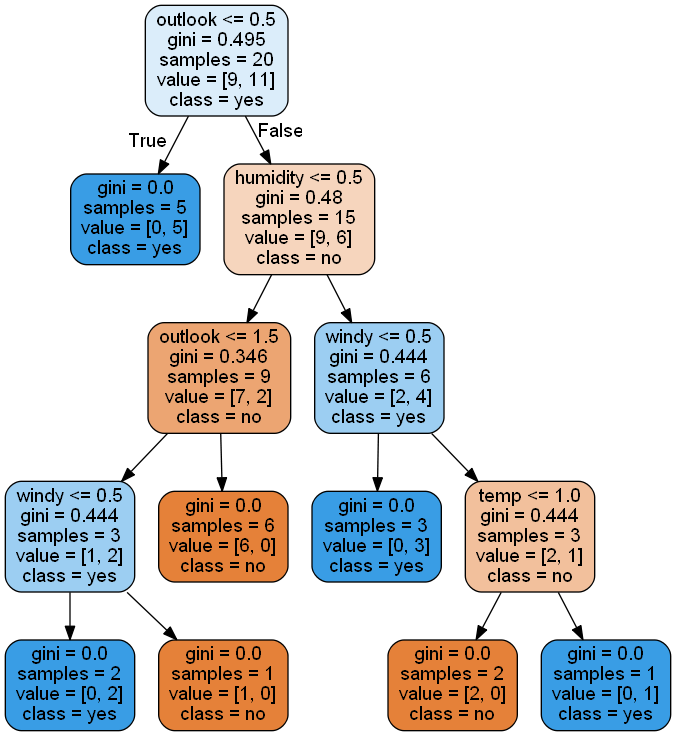

In [40]:
#แสดง diagram

data_feature_names = 'outlook','temp','humidity', 'windy'

import pydotplus

from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(model, out_file=None, 
                           feature_names=data_feature_names,  
                           class_names=class_names, # 
                           filled=True,
                           rounded=True)


graph = pydotplus.graph_from_dot_data(dot_data)  # Draw graph
Image(graph.create_png())  # Show graph             

#พิจารณาที่ค่า outlook ก่อน เช่น ถ้า outlook <= 0.5 (supercast หรือ 0) ผลลัพธ์จะเป็น yes ถ้า outlook > 0.5 ซึ่งก็คือ 1 หรือ 2 ก็พิจารณา humidity เป็นลำดับถัดไป เป็นชั้น ๆ ต่อไป

In [42]:
#การประเมิน Model เบื้องต้น

df = pd.read_csv('data/playtennis-14rec.csv')

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
#แบ่ง 20% ไว้ Test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) #0.2 คือ 20%

In [44]:
print('Total X: {}'. format(len(X)))
print('Total train: {}'. format(len(X_train)))
print('Total test: {}'. format(len(X_test)))
X_test

Total X: 20
Total train: 16
Total test: 4


,outlook_,temp_,humidity_,windy_
7,2,2,0,0
11,0,2,0,1
15,1,2,0,0
0,2,1,0,0


In [48]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
y_predict = model.predict(X_test)
y_predict

array([0, 1, 1, 0])

In [50]:
y_test

array([0, 1, 1, 0])

In [51]:
print('Accuracy %: {:.2f}'.format(accuracy_score(y_test, y_predict) * 100))

Accuracy %: 100.00
